In [ ]:
silverzone = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_5조/Data/silverzone.csv')
silverzone.head()

,대상시설명,시군구명,소재지도로명주소,위도,경도
0,관악노인복지관,관악구,서울특별시 관악구 봉천동 보라매로 35 관악노인종합복지관,37.493042,126.926301
1,동명노인복지관,관악구,서울특별시 관악구 봉천로23라길 15,37.488442,126.937231
2,덕진경로당,관악구,서울특별시 관악구 봉천동 남부순환로234길 37 덕진경로당,37.477696,126.956795
3,백설경로당,관악구,서울특별시 관악구 봉천동 관악로6길 50 백설경로당,37.476237,126.953512
4,관악시니어클럽,관악구,서울특별시 관악구 봉천동 남부순환로247다길 60 원당경로당,37.478627,126.964194


In [ ]:
len(silverzone)

145

In [ ]:
from folium import Circle

In [ ]:
m = folium.Map(location=[37.58, 127.0], tiles="cartodbpositron", zoom_start=11)

# 지도에 사고다발지점 표시(빨간색 원, 반경 200미터)
for i in oldman.index :
    folium.Circle(
        location = oldman.loc[i, ['위도', '경도']],
        radius = 200,
        color = 'red'
    ).add_to(m)

# 지도에 노인보호구역 표시(파란색 원, 반경 300미터)
for i in silverzone.index :
    folium.Circle(
        location = silverzone.loc[i, ['위도', '경도']],
        radius = 300,
        color = 'dodgerblue'
    ).add_to(m)


m

- 서울시 전체 노인보호구역 145곳 중 17곳이 사고다발지역을 포함
 - 사고다발지역에 추가로 노인보호구역을 지정할 필요가 있음 
- 노인보호구역으로 지정되었음에도 불구하고 사고다발지역인 지점 존재
 - 노인보호구역에 대한 인식 재고 및 사후관리 필요

In [ ]:
population = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_5조/Data/2020_고령인구비율.csv', encoding='cp949')
population

,행정구역별,고령인구비율,65세이상인구
0,종로구,19.0,28311
1,중구,19.3,24174
2,용산구,17.3,39779
3,성동구,15.5,45435
4,광진구,14.5,50311
5,동대문구,18.0,61612
6,중랑구,17.6,69341
7,성북구,16.8,73613
8,강북구,20.6,63313
9,도봉구,19.1,62009


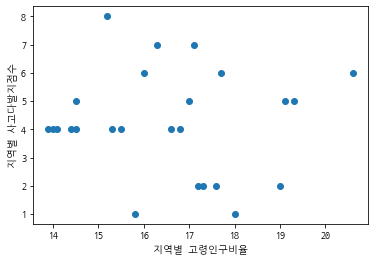

In [ ]:
plt.scatter(x=population['고령인구비율'], y=oldman_count['지점명'])
plt.xlabel('지역별 고령인구비율')
plt.ylabel('지역별 사고다발지점수')
plt.show()

- 산점도를 그려본 결과 지역별 '고령인구비율'과 '사고다발지역 지점수'간에 상관관계는 없는 것으로 보인다.

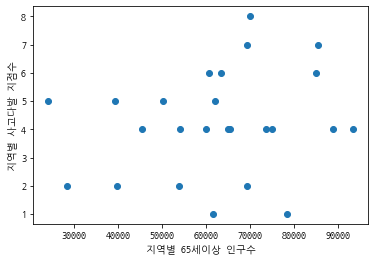

In [ ]:
plt.scatter(x=population['65세이상인구'], y=oldman_count['지점명'])
plt.xlabel('지역별 65세이상 인구수')
plt.ylabel('지역별 사고다발 지점수')
plt.show()

- 산점도를 그려본 결과 마찬가지로 지역별 '65세이상 인구수'와 '사고다발지역 지점수'간에 상관관계는 없는 것으로 보인다. 
 - 특정 지점에서의 잦은 사고발생이 노인 인구 분포와는 상관이 없으며, 다른 연관된 변수가 존재한다고 볼 수 있을 것 같다.

## 데이터 설명
- 사고다발지점의 위도,경도 데이터를 이용하여 구글 지도에서 스트리트뷰를 확인하여 변수를 정성분석.
- '교차로', '시장', '무신호 횡단로', '병원'을 독립변수, '사고발생건수'를 종속변수로 하여 분석을 시행해보자.

```
발생건수가 4 이상인 지점을 정성분석한 데이터
(사고다발지점 전체데이터의 발생건수의 평균이 약 '4.12'이기 때문에 발생건수가 4 이상인 지점까지 분석.)
- 독립변수는 모두 범주형 변수이며 변수가 존재하는 경우 1, 그렇지 않은 경우 0으로 표기
- 보행노인사고다발지역 데이터(2020)와 구글 지도에서 제공하는 스트리트뷰에는 시차가 존재하고, 
  지마음대로 변수 설정하고 정성분석 했기 때문에 통계적으로는 무의미...
  따라서 '이런 식으로 노인보행자 교통사고의 원인을 찾아볼 수도 있겠구나! 근데 머리가 나쁘면 몸이 고생하는구나!'하고 참고해주시면 됩니다 흑흑
```

In [ ]:
variable = pd.read_csv('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_5조/Data/variable.csv')
variable

,지점명,교차로,시장,무신호횡단로,병원,발생건수,사상자수
0,서울특별시 동작구 상도동(성대약국 부근),1,1,1,0,13,14
1,서울특별시 동대문구 제기동(성바오로병원앞교차로 부근),1,1,0,1,10,10
2,서울특별시 동대문구 용두동(경동시장앞교차로 부근),1,1,0,0,9,12
3,서울특별시 종로구 숭인동(아람보습학원 부근),0,1,0,0,9,10
4,서울특별시 동대문구 회기동(경희대 부근),0,0,0,1,6,11
...,...,...,...,...,...,...,...
59,서울특별시 영등포구 신길동(신길동3994 부근),1,0,1,0,4,4
60,서울특별시 영등포구 당산동1가(영등포청과시장앞교차로 부근),1,1,0,1,4,4
61,서울특별시 동작구 사당동(남성역앞교차로 부근),1,0,1,0,4,4
62,서울특별시 강동구 천호동(천호사거리 부근),1,0,1,1,4,4


In [ ]:
variable.describe()

,교차로,시장,무신호횡단로,병원,발생건수,사상자수
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.718750,0.296875,0.640625,0.343750,4.984375,5.328125
std,0.453163,0.460493,0.483610,0.478714,1.588572,2.008353
min,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
50%,1.000000,0.000000,1.000000,0.000000,5.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,13.000000,14.000000


In [ ]:
variable[variable['발생건수'] > 4.98].describe()

,교차로,시장,무신호횡단로,병원,발생건수,사상자수
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,0.676471,0.411765,0.470588,0.294118,5.852941,6.294118
std,0.474858,0.499554,0.506640,0.462497,1.777509,2.303218
min,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
50%,1.000000,0.000000,0.000000,0.000000,5.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,13.000000,14.000000


- 발생건수가 평균발생건수(4.98)보다 높은 지점의 경우 평균발생건수보다 낮은 지점에 비해 사고다발지점에 시장이 위치해있는 경우가 상대적으로 더 많음.

In [ ]:
variable[variable['발생건수'] < 4.98].describe()

,교차로,시장,무신호횡단로,병원,발생건수,사상자수
count,30.000000,30.000000,30.000000,30.000000,30.0,30.000000
mean,0.766667,0.166667,0.833333,0.400000,4.0,4.233333
std,0.430183,0.379049,0.379049,0.498273,0.0,0.626062
min,0.000000,0.000000,0.000000,0.000000,4.0,4.000000
25%,1.000000,0.000000,1.000000,0.000000,4.0,4.000000
50%,1.000000,0.000000,1.000000,0.000000,4.0,4.000000
75%,1.000000,0.000000,1.000000,1.000000,4.0,4.000000
max,1.000000,1.000000,1.000000,1.000000,4.0,6.000000


- 발생건수가 평균발생건수(4.98)보다 낮은 지점의 경우 평균발생건수보다 높은 지점에 비해 무신호횡단로가 있는 경우가 상대적으로 더 많음.
 - 무신호횡단로에 신호등을 설치하면 사고발생을 크게 줄일 수 있을 것으로 예상됨

In [ ]:
print('시장이 있는 지점의 수:', len(variable[variable['시장'] == 1]))
print('시장과 교차로가 함께 있는 지점의 수:', variable['시장'][variable['교차로'] == 1].sum())

시장이 있는 지점의 수: 19
시장과 교차로가 함께 있는 지점의 수: 15


- 인근에 시장이 있는 사고지점에 교차로가 있는 경우 전체에서 약 78.95%의 비율을 차지하며, 노인 유동인구가 많을 것으로 추정되는 지점에 교통량 또한 많을 것으로 예상.
 - 노인 유동인구가 많은 지점에서 노인보행자 보호를 위한 대책이 필요

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x_variable = variable[['교차로', '시장', '무신호횡단로', '병원']]

In [ ]:
multi_model = sm.OLS(y, x_variable)
fitted_multi_model = multi_model.fit()

In [ ]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   발생건수   R-squared (uncentered):                   0.777
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              52.12
Date:                Tue, 18 Jan 2022   Prob (F-statistic):                    7.30e-19
Time:                        07:00:59   Log-Likelihood:                         -148.72
No. Observations:                  64   AIC:                                      305.4
Df Residuals:                      60   BIC:                                      314.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
교차로            2.9848      0.565      5.282      0.000       1.854       4.115
시장             2.4467      0.694      3.526      0.001       1.059       3.834
무신호횡단로         1.3233      0.605      2.188      0.033       0.113       2.533
병원             1.3583      0.657      2.069      0.043       0.045       2.672
==============================================================================
Omnibus:                        1.359   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                0.948
Skew:                           0.295   Prob(JB):                        0.623
Kurtosis:                       3.082   Cond. No.                         3.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_variable.values, i) for i in range(x_variable.shape[1])]
vif['variable'] = x_variable.columns
vif

,VIF,variable
0,2.255095,교차로
1,1.403912,시장
2,2.303134,무신호횡단로
3,1.455719,병원


- 회귀분석 돌렸더니 모든 변수의 p-value값이 0.05이하다..! 감히 각 변수가 발생건수에 유의미한 영향을 준다고 봐도 되는건지ㅋㅋ
- 수정된 결정계수도 무려 0.762이다. 
- Prob(omnibus)도 유의수준인 0.05를 훨씬 웃도는 수치라 잔차항이 정규분포를 따른다고 볼 수 있다.
- 왜도(Skew), 첨도(Kurtosis)도 정규성을 만족..
- 심지어 VIF도 전부 10 이하.. 다중공선성도 없다고?
- ㅋㅋㅋ웃긴다..